# Знакомство с `torch.Tensor`

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/torch.html


## Задачи для совместного разбора

In [16]:
import pandas as pd
import torch as th
import numpy as np
th.device("cuda" if th.cuda.is_available() else "cpu")

device(type='cuda')

1\. Создайте тензор и исследуйте его основные характеристики

In [17]:
t = th.rand(2,3,4)
t.shape, t.dtype 

(torch.Size([2, 3, 4]), torch.float32)

2\. Создайте трехмерный тензор и рассмотрите основные способы индексирования по нему

In [18]:
mask = [1,0,1]

t[:,mask]

tensor([[[0.8183, 0.0537, 0.0075, 0.5181],
         [0.8550, 0.9038, 0.6904, 0.4794],
         [0.8183, 0.0537, 0.0075, 0.5181]],

        [[0.8167, 0.7957, 0.1295, 0.9844],
         [0.5425, 0.6527, 0.9619, 0.3844],
         [0.8167, 0.7957, 0.1295, 0.9844]]])

In [19]:
t[0].shape

torch.Size([3, 4])

3\. Создайте тензор (4х4) и модифицируйте следующим образом: ко всем четным столбцам прибавьте 1, из нечетных вычтите 1.

In [20]:
t = th.rand(4,4)
display(t)

t[:,1::2] +=1
t[:,::2] -=1

t

tensor([[0.6181, 0.1696, 0.3190, 0.5835],
        [0.2154, 0.3077, 0.0244, 0.7770],
        [0.2659, 0.0541, 0.5637, 0.9074],
        [0.0647, 0.2997, 0.9025, 0.7323]])

tensor([[-0.3819,  1.1696, -0.6810,  1.5835],
        [-0.7846,  1.3077, -0.9756,  1.7770],
        [-0.7341,  1.0541, -0.4363,  1.9074],
        [-0.9353,  1.2997, -0.0975,  1.7323]])

4\. Обсудите совместимость `torch` с `numpy` и `sklearn`

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте двумерный тензор размера (100000, 10), заполненный нулями. Используя прихотливое индексирование, поставьте в каждой строке тензора ровно одну единицу в случайно выбранном столбце. Рассчитайте и выведите на экран вероятности $p_i$ того, что для случайно выбранной строки в столбце $i$ будет стоять единица.

- [x] Проверено на семинаре

In [21]:
t = th.zeros([100000, 10], dtype=th.float32)
t[th.arange(100000),th.randint(0, 10, (100000,))] = 1
t.mean(0)

tensor([0.1001, 0.1018, 0.1000, 0.0998, 0.0993, 0.0979, 0.0993, 0.0990, 0.1007,
        0.1020])

<p class="task" id="2"></p>

2\. При помощи прихотливого индексирования для двумерного тензора размерности (10, 10), состоящего из случайных целых чисел в пределах от 0 до 10, получите тензор элементов, находящихся сразу над  побочной диагональю.

- [ ] Проверено на семинаре

In [22]:
t = th.randint(0,11,(10,10))
mask = np.bool([i[::-1] for i in np.vectorize(np.logical_xor)(np.triu(np.ones(t.shape),2),np.triu(np.ones(t.shape),1))])

display(t)
t[mask]

tensor([[ 7,  5,  0, 10,  0,  3,  3,  7,  6,  7],
        [ 4,  2,  9, 10,  3,  7,  0, 10,  7,  1],
        [ 3,  2,  0,  2,  4,  6,  9,  2,  9,  1],
        [ 3,  6,  0,  0,  6,  1,  2,  5,  6, 10],
        [ 1, 10,  2,  6,  3,  2,  7,  9,  6,  0],
        [ 9, 10,  4,  0,  6,  0,  2,  4, 10, 10],
        [ 0,  3,  9,  5,  2,  8,  1,  8,  6, 10],
        [ 8,  8,  3,  5, 10,  2,  3,  7, 10,  9],
        [ 5,  4,  0,  3,  4,  2,  7,  1,  6,  7],
        [ 7,  0,  9,  4,  4,  5,  6,  2,  3,  0]])

tensor([ 6, 10,  9,  1,  3,  0,  9,  8,  5])

In [23]:
n = 10
rows, cols = np.ogrid[:n, :n]
mask = rows + cols < n - 1
t[mask]

tensor([ 7,  5,  0, 10,  0,  3,  3,  7,  6,  4,  2,  9, 10,  3,  7,  0, 10,  3,
         2,  0,  2,  4,  6,  9,  3,  6,  0,  0,  6,  1,  1, 10,  2,  6,  3,  9,
        10,  4,  0,  0,  3,  9,  8,  8,  5])

<p class="task" id="3"></p>

3\. Создайте двумерный тензор $t$ размерности (5, 5), состоящий из случайных чисел в пределах от 0 до 100. Обнулите все значения в массиве, расположенные вне квадрата размера 3х3 вокруг максимального элемента. Если максимумов несколько, обнулите элементы около любого из них.

- [x] Проверено на семинаре

In [24]:
t = th.randint(0,101,(5,5))
row_max, col_max = th.unravel_index(th.argmax(t), t.shape)

row_start = max(0, row_max - 1)
row_end = min(5, row_max + 2)
col_start = max(0,col_max - 1)
col_end = min(5, col_max + 2)

mask = th.zeros_like(t, dtype=th.bool)
mask[row_start:row_end, col_start:col_end] = True

result = t.clone()
result[~mask] = 0

t, result

(tensor([[ 0, 54,  7, 64, 67],
         [92,  4, 16, 72, 27],
         [95, 56, 25, 59, 50],
         [ 3, 43, 15, 45, 96],
         [55, 31, 35, 26, 88]]),
 tensor([[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0, 59, 50],
         [ 0,  0,  0, 45, 96],
         [ 0,  0,  0, 26, 88]]))

<p class="task" id="4"></p>

4\. Создайте трехмерный массив размерности (2, 5, 5) на основе решения задачи 3 (объедините исходный и результирущий тензор вдоль нулевой оси). Сохраните полученный трехмерный тензор в файл `tensor.pt`. Загрузите полученный тензор и покажите, что все элементы двух тензоров совпадают.

- [x] Проверено на семинаре

In [25]:
t_u = th.stack([t, result], dim=0)
display(t_u)
th.save(t_u, 'tensor.pt')

load_t=th.load('tensor.pt')
display(load_t)
th.all(t_u == load_t)

tensor([[[ 0, 54,  7, 64, 67],
         [92,  4, 16, 72, 27],
         [95, 56, 25, 59, 50],
         [ 3, 43, 15, 45, 96],
         [55, 31, 35, 26, 88]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0, 59, 50],
         [ 0,  0,  0, 45, 96],
         [ 0,  0,  0, 26, 88]]])

tensor([[[ 0, 54,  7, 64, 67],
         [92,  4, 16, 72, 27],
         [95, 56, 25, 59, 50],
         [ 3, 43, 15, 45, 96],
         [55, 31, 35, 26, 88]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0],
         [ 0,  0,  0, 59, 50],
         [ 0,  0,  0, 45, 96],
         [ 0,  0,  0, 26, 88]]])

tensor(True)

<p class="task" id="5"></p>

5\. Создайте четырехмерный массив `t` размерности (2, 3, 5, 5), заполненный случайными целыми числами от 1 до 10 (сами значения должны быть представлены типом float32). Рассчитайте среднее значение для каждого двумерного тензора `t[i, j, :, :]`. Представьте результат в виде трехмерного тензора размера (2, 3, 1).

- [x] Проверено на семинаре

In [26]:
t5 = th.randint(1,11,(2, 3, 5, 5), dtype=th.float32)
t5.mean(dim=(3,2), keepdim=False).reshape(2,3,1)

tensor([[[5.1600],
         [5.5200],
         [5.3200]],

        [[6.1200],
         [5.8800],
         [4.6400]]])

<p class="task" id="6"></p>

6\. Создайте одномерный тензор размера `N=100_000_000`, заполненный числами из экспоненциального распредления с параметром $\lambda=5$. Рассчитайте значения для построения гистограммы при помощи пакета `torch`. Визуализируйте гистограмму. Проверьте возможность использования GPU. При наличии GPU перенесите созданный тензор в память GPU, повторите вычисления. Сравните время расчетом с и без использования GPU.

- [x] Проверено на семинаре

end_cpu=1.534938097000122 sec


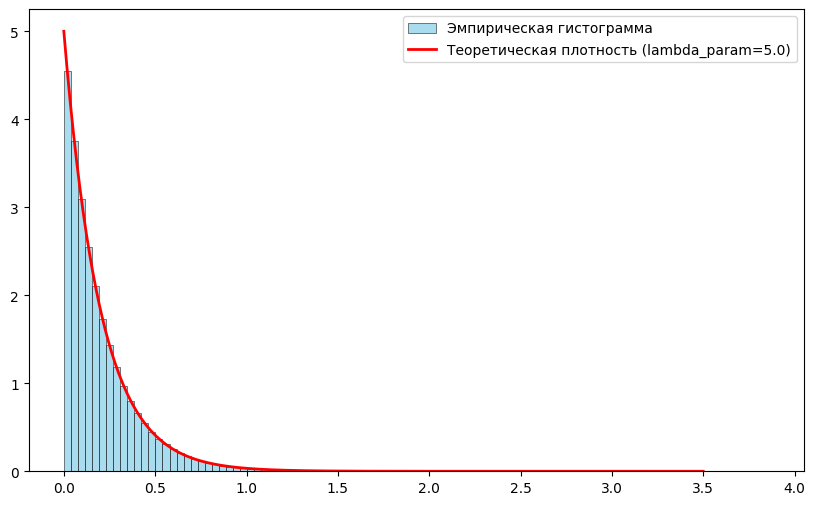

Cuda available!
end_gpu=0.0017774105072021484 sec


In [27]:
import matplotlib.pyplot as plt
import time
N=100_000_000
lambda_param = 5.0

start_cpu = time.time()
exponential_dist = th.distributions.Exponential(th.tensor(lambda_param))
sample_tensor = exponential_dist.sample([N])
end_cpu = time.time() - start_cpu

print(f'{end_cpu=} sec')

plt.figure(figsize=(10, 6))
plt.hist(sample_tensor.numpy(), bins=100, density=True, alpha=0.7, color='skyblue', edgecolor='black', linewidth=0.5, label='Эмпирическая гистограмма')
x = np.linspace(0, 3.5, 1000)
y = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, y, 'r-', linewidth=2, label=f'Теоретическая плотность ({lambda_param=})')
plt.legend()
plt.show()



if th.cuda.is_available():
    print('Cuda available!')
    start_gpu = time.time()
    exponential_dist = th.distributions.Exponential(th.tensor(lambda_param, device='cuda'))
    sample_tensor = exponential_dist.sample([N])
    end_gpu = time.time() - start_gpu

    print(f'{end_gpu=} sec')

<p class="task" id="7"></p>

7\. Создайте четырехмерный тензор размера (10, 6, 6, 3), заполненный случайными целыми числами от 0 до 255. Считая, что данный тензор представляет собой батч из 10 картинок размера 6х6 в формате RGB, измените тензор следующим образом. Для оттенков красного обнулите все столбцы, кроме первых двух; для оттенков зеленого обнулите третий и четвертый столбцы; для оттенков синего обнулите пятый и шестой столбцы. Для выполнения задания используйте механизм распространения.

- [ ] Проверено на семинаре

In [28]:
t = th.randint(0,256,(10, 6, 6, 3))
t[:, :, :, 0][:,:,:2] =0
t[:, :, :, 1][:,:,[2,3]] =0
t[:, :, :, 2][:,:,[4,5]] =0

t

tensor([[[[  0, 173, 128],
          [  0,  38, 151],
          [202,   0, 175],
          [161,   0, 144],
          [195,  16,   0],
          [238, 117,   0]],

         [[  0, 107, 232],
          [  0, 200,  94],
          [ 69,   0, 125],
          [221,   0,  58],
          [ 47, 180,   0],
          [ 83, 219,   0]],

         [[  0,  12, 190],
          [  0,   4, 162],
          [ 34,   0, 173],
          [141,   0,  49],
          [ 16,  15,   0],
          [ 42,  18,   0]],

         [[  0, 198,  26],
          [  0,  68, 219],
          [219,   0,  29],
          [113,   0, 238],
          [  6, 161,   0],
          [  7, 196,   0]],

         [[  0, 101,  29],
          [  0, 119, 115],
          [246,   0, 226],
          [211,   0,   4],
          [232, 146,   0],
          [172, 190,   0]],

         [[  0, 237, 215],
          [  0, 219, 216],
          [ 48,   0, 220],
          [155,   0, 218],
          [ 92, 134,   0],
          [ 33, 116,   0]]],


        [[[  0

In [29]:
t = th.randint(0,256,(10, 6, 6, 3))
t[:, :, 2:, 0] =0
t[:, :, [2,3], 1] =0
t[:, :,[4,5] , 2] =0

t

tensor([[[[ 15, 142,  66],
          [206, 197, 111],
          [  0,   0, 140],
          [  0,   0, 114],
          [  0,  43,   0],
          [  0,  88,   0]],

         [[111, 202, 147],
          [ 26, 172,  13],
          [  0,   0,  35],
          [  0,   0, 174],
          [  0, 193,   0],
          [  0,  80,   0]],

         [[172, 145,  89],
          [108, 139,  82],
          [  0,   0, 151],
          [  0,   0,  85],
          [  0,  35,   0],
          [  0, 130,   0]],

         [[ 68, 160,  71],
          [  4, 212, 240],
          [  0,   0,  62],
          [  0,   0,  57],
          [  0, 214,   0],
          [  0,  44,   0]],

         [[128, 205, 121],
          [254,  25,   4],
          [  0,   0,  69],
          [  0,   0, 254],
          [  0, 243,   0],
          [  0,  65,   0]],

         [[ 83, 194, 115],
          [227, 120, 163],
          [  0,   0, 103],
          [  0,   0, 160],
          [  0, 226,   0],
          [  0, 218,   0]]],


        [[[144